Other ideas: do something with Ticket attribute?

In [2]:
ls titanic_data

gender_submission.csv  test.csv  train.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train_data = pd.read_csv('titanic_data/train.csv')
test_data = pd.read_csv('titanic_data/test.csv')
gender_submission_data = pd.read_csv('titanic_data/gender_submission.csv')

print(train_data.shape, test_data.shape, gender_submission_data.shape)
print(train_data.columns)

(891, 12) (418, 11) (418, 2)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


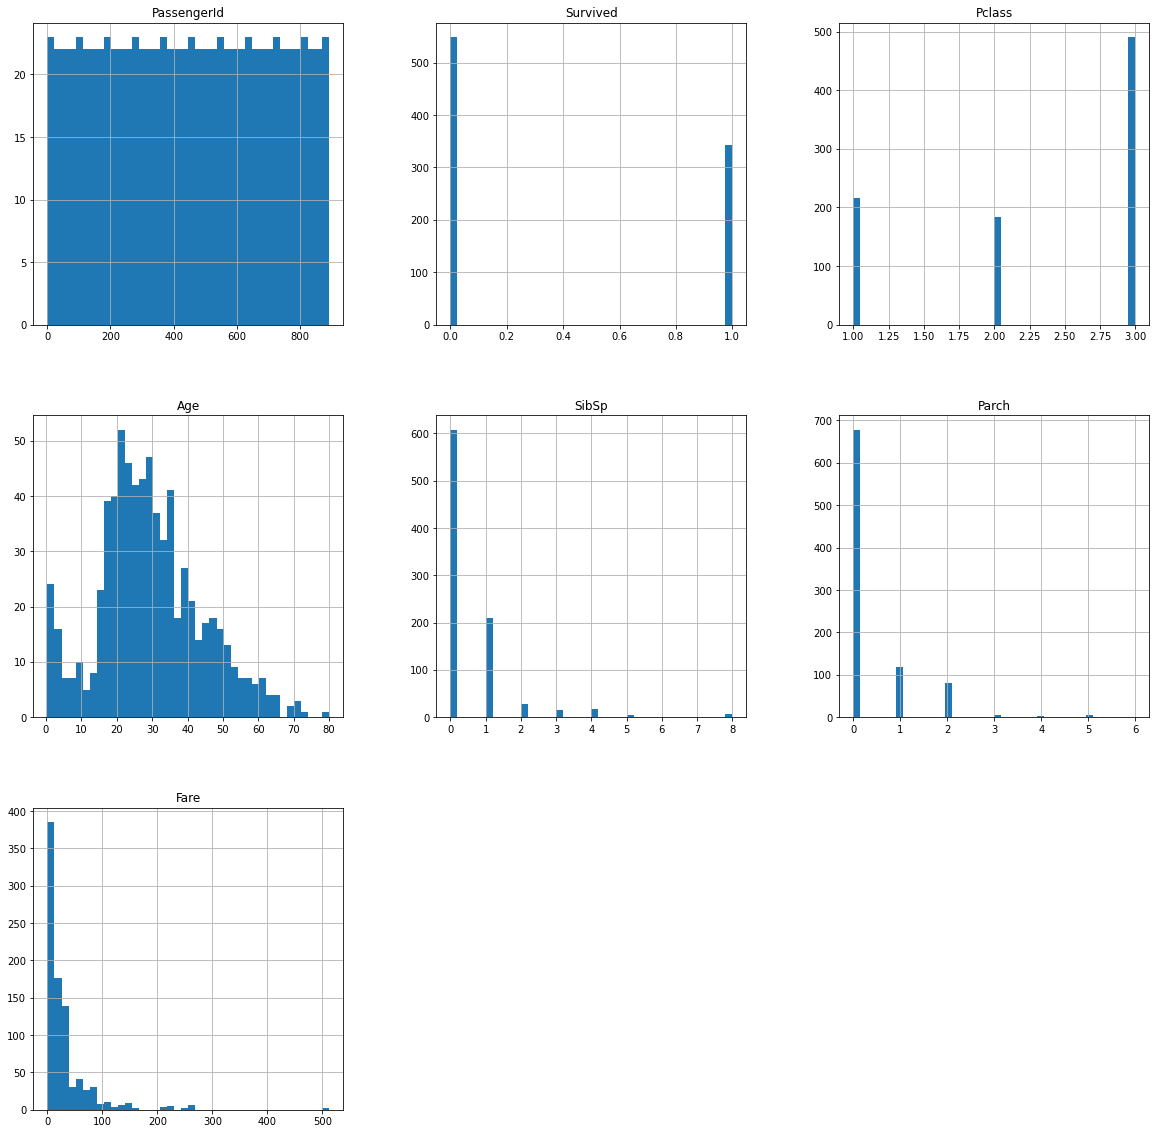

In [9]:
%matplotlib inline
train_data.hist(bins=40, figsize=(20,20));

In [10]:
corr_matrix = train_data.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [11]:
#Gets a list of titles in the names:
titles = train_data['Name'].str.extract(r'([A-Z][a-z]+)\.')[0]

#Adds a title attribute to a copy of train_data_copy:
train_data_copy = train_data.copy()
train_data_copy['title'] = titles

#Gets description of the counts and survival proportions of titles:
title_counts = train_data_copy.groupby('title').size()
title_counts.name = 'count'
title_surv_props = train_data_copy.groupby('title')['Survived'].mean()
title_surv_props.name = 'survival proportion'
pd.concat([title_counts, title_surv_props], axis=1).sort_values('count', ascending=False)

,count,survival proportion
title,,
Mr,517,0.156673
Miss,182,0.697802
Mrs,125,0.792000
Master,40,0.575000
Dr,7,0.428571
Rev,6,0.000000
Major,2,0.500000
Col,2,0.500000
Mlle,2,1.000000


In [12]:
#(In general, we'll take advantage of the fact that we know the structure of the test data to
#determine specific data prep steps.)

#Based on this and the cell above, I'll keep Mr, Miss, Mrs, Master, and Rev as titles
#in the prepped data.

test_titles = test_data['Name'].str.extract(r'([A-Z][a-z]+)\.')[0]
test_data_copy = test_data.copy()
test_data_copy['title'] = test_titles
test_data_copy.groupby('title').size()

title
Col         2
Dona        1
Dr          1
Master     21
Miss       78
Mr        240
Mrs        72
Ms          1
Rev         2
dtype: int64

In [13]:
#Defines two transformers that adds a title categorical attribute
#(FinalTitleAdder adds the final titles in the prepped data,
# and TitleAdder is used only for filling in missing ages):

from sklearn.base import BaseEstimator, TransformerMixin
    
class FinalTitleAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        titles = X['Name'].str.extract(r'(Mr|Mrs|Miss|Master|Rev)\.')[0]
        X['title'] = titles
        return X
    
class TitleAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        titles = X['Name'].str.extract(r'([A-Z][a-z]+)\.')[0]
        X['title'] = titles
        return X

In [14]:
#Fills in missing age values by average in title and fare value by overall median:

class FillMissingAgesFare(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        title_adder = TitleAdder()
        X_copy = X.copy()
        self.X_ = title_adder.transform(X_copy)
        return self
    def transform(self, X):
        X['Age'] = X['Age'].fillna(self.X_.groupby('title')['Age'].transform('mean'))
        X['Fare'] = X['Fare'].fillna(self.X_['Fare'].median())
        return X

In [15]:
#Sees which letters are in one but not both of the test/train cabin letters:

letters_train = set(train_data['Cabin'].str.extract(r'([A-Z])')[0])
letters_test = set(test_data['Cabin'].str.extract(r'([A-Z])')[0])

letters_train.symmetric_difference(letters_test)

{'T'}

In [16]:
#Gets the first letter off of the known cabin names (except T):

class CabinLetterGetter(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        letters = X['Cabin'].str.extract(r'([A-SU-Z])')[0]
        X['cabin_letter'] = letters
        return X

In [17]:
#Sees which prefixes are in one but not both of the test/train ticket values:

prefixes_train = set(train_data['Ticket'].str.extract(r'(\S+)\s')[0])
prefixes_test = set(test_data['Ticket'].str.extract(r'(\S+)\s')[0])

missing_prefixes = prefixes_train.symmetric_difference(prefixes_test)

In [18]:
#Gets any ticket number prefixes:

class TicketPrefixGetter(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        prefixes = X['Ticket'].str.extract(r'(\S+)\s')[0]
        prefixes = [np.nan if p in missing_prefixes else p for p in prefixes]
        X['ticket_prefix'] = prefixes
        return X

In [19]:
#Adds the values of the SibSp and Parch attributes for a new attribute:

class GetCompanionNum(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['num_of_companions'] = X['SibSp'] + X['Parch']
        return X

In [20]:
#Drops some attributes:

class AttribDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
        return X

In [21]:
#Does one-hot encoding with pandas dataframe:

class PandasOneHot(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
        X = pd.get_dummies(X)
        return X

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

pipeline_unscaled = Pipeline([
    ('fill_ages_fare', FillMissingAgesFare()),
    ('final_title_adder', FinalTitleAdder()),
    ('cabin_letter_getter', CabinLetterGetter()),
    ('ticket_prefix_getter', TicketPrefixGetter()),
    ('companions', GetCompanionNum()),
    ('attrib_dropper', AttribDropper()),
    ('one_hot_encoder', PandasOneHot())
])

pipeline_scaled = Pipeline([
    ('pipeline_unscaled', pipeline_unscaled),
    ('std_scaler', StandardScaler())
])

In [23]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

X2 = X.copy()
test_data2 = test_data.copy()
test_data3 = test_data.copy()

X_unscaled = pipeline_unscaled.fit_transform(X)
X_scaled = pipeline_scaled.fit_transform(X2)

test_data_unscaled = pipeline_unscaled.transform(test_data2)
test_data_scaled = pipeline_scaled.transform(test_data3)

In [24]:
#For extra practice, before digging into fitting models, we'll define a gender classifier
#and see its accuracy and if it matches the gender_submission_data.

class GenderClassifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return (X['Sex_male'] == 0).astype(int)

In [25]:
#Checks that the gender classifier does the correct thing on the training set:

gender_classifier = GenderClassifier()
gender_predictions_train = gender_classifier.predict(X_unscaled)
gender_predictions_train.equals(1-X_unscaled['Sex_male'].astype(int))

True

In [26]:
#Checks that the predictions the gender classifier makes on the test set
#match what's in the gender_submission_data:

gender_predictions = gender_classifier.predict(test_data_unscaled)
gender_submission_data['Survived'].equals(gender_predictions)

True

In [27]:
#Computes the accuracy of gender predictions on the training set:

from sklearn.metrics import accuracy_score
accuracy_score(y, gender_predictions_train)

0.7867564534231201

In [28]:
#This doesn't mean a whole lot, but just to check things, this gives
#the accuracy score for an sgd classifier:

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_scaled, y)
sgd_predictions_train = sgd_clf.predict(X_scaled)
accuracy_score(y, sgd_predictions_train)

0.7654320987654321

In [29]:
#Mean cross-validation score for sgd classifier:

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_scaled, y, cv=5, scoring='accuracy').mean()

0.7609440713075136

In [30]:
#Gets mean cv score for logistic regression classifier:

from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression()
cross_val_score(logistic_clf, X_scaled, y, cv=5, scoring='accuracy').mean()

0.8114305442219573

In [31]:
#Does a grid search for logistic regression classifier:

from sklearn.model_selection import GridSearchCV

param_grid_logistic = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2']}
]
grid_search_logistic = GridSearchCV(logistic_clf, param_grid_logistic, cv=3,
                          scoring='accuracy',
                          return_train_score=False)

grid_search_logistic.fit(X_scaled, y)

print('Best params: ' + str(grid_search_logistic.best_params_))
print('Score: ' + str(grid_search_logistic.best_score_))

Best params: {'penalty': 'l1', 'solver': 'liblinear'}
Score: 0.8148148148148149


In [32]:
final_model_lg = grid_search_logistic.best_estimator_

test_predictions_lg = final_model_lg.predict(test_data_scaled)

final_submission_lg = gender_submission_data.copy()
final_submission_lg['Survived'] = test_predictions_lg

final_submission_lg.to_csv('submission_lg.csv', index=False)

In [33]:
#Gets mean cv score for knn classifier:

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_scaled, y, cv=3, scoring='accuracy').mean()

0.7934904601571269

In [34]:
#Does a grid search for knn classifier:

param_grid_knn = {'n_neighbors': [2, 3, 4, 5, 6, 7], 'weights': ['distance', 'uniform']}

from sklearn.model_selection import GridSearchCV

grid_search_knn = GridSearchCV(knn_clf, param_grid_knn, cv=3,
                          scoring='accuracy',
                          return_train_score=False)

grid_search_knn.fit(X_scaled, y)

print('Best params: ' + str(grid_search_knn.best_params_))
print('Score: ' + str(grid_search_knn.best_score_))

Best params: {'n_neighbors': 3, 'weights': 'uniform'}
Score: 0.8013468013468014


In [55]:
#Gets mean cv score for support vector classifier:

from sklearn.svm import SVC
sv_clf = SVC(probability=True)
cross_val_score(sv_clf, X_scaled, y, cv=3, scoring='accuracy').mean()

0.8204264870931537

In [36]:
#Does a grid search for support vector classifier:

param_grid_sv = [
    {'gamma': ['auto']},
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma':[.001, .0001]},
]

grid_search_sv = GridSearchCV(sv_clf, param_grid_sv, cv=3,
                          scoring='accuracy',
                          return_train_score=False)

grid_search_sv.fit(X_scaled, y)

print('Best params: ' + str(grid_search_sv.best_params_))
print('Score: ' + str(grid_search_sv.best_score_))

Best params: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Score: 0.8237934904601572


In [37]:
#Gets mean cv score for decision tree classifier:

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
cross_val_score(dt_clf, X_scaled, y, cv=3, scoring='accuracy').mean()

0.7631874298540965

In [38]:
#Gets mean cv score for random forest classifier:

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
cross_val_score(rf_clf, X_scaled, y, cv=3, scoring='accuracy').mean()

0.8013468013468014

In [39]:
#Does a grid search for random forest classifier:

param_grid_rf = [
    {'n_estimators': [170, 175, 180, 185, 190, 195], 'max_depth': [2, 3, 4, 5, 6]}
]

grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=3,
                          scoring='accuracy',
                          return_train_score=False)

grid_search_rf.fit(X_scaled, y)

print('Best params: ' + str(grid_search_rf.best_params_))
print('Score: ' + str(grid_search_rf.best_score_))

Best params: {'max_depth': 5, 'n_estimators': 170}
Score: 0.8316498316498316


In [40]:
feature_importances = grid_search_rf.best_estimator_.feature_importances_
sorted(zip(feature_importances, X_unscaled.columns), reverse=True)

[(0.2418273443035606, 'title_Mr'),
 (0.2018229652322192, 'Sex_male'),
 (0.0873533348640185, 'Pclass'),
 (0.08088765712986748, 'Fare'),
 (0.06098606229158106, 'title_Miss'),
 (0.059398071817205605, 'title_Mrs'),
 (0.05239905847712107, 'num_of_companions'),
 (0.04896638999405363, 'Age'),
 (0.033236401399108606, 'SibSp'),
 (0.0188922837268809, 'Parch'),
 (0.01592690558736966, 'cabin_letter_B'),
 (0.014337508984163904, 'Embarked_S'),
 (0.013810570771550592, 'title_Master'),
 (0.011371988023582332, 'cabin_letter_E'),
 (0.010945448816376145, 'Embarked_C'),
 (0.007182438581742083, 'cabin_letter_D'),
 (0.0067423811517899855, 'ticket_prefix_PC'),
 (0.005527188367660512, 'cabin_letter_C'),
 (0.003924282878462283, 'ticket_prefix_W./C.'),
 (0.003078116415964339, 'Embarked_Q'),
 (0.0027574783297747056, 'ticket_prefix_STON/O'),
 (0.0018797098454650483, 'title_Rev'),
 (0.0017184332568995597, 'ticket_prefix_S.O./P.P.'),
 (0.0017126476619659186, 'ticket_prefix_CA'),
 (0.001410085938881736, 'ticket_pref

In [41]:
#Most of the above looks like it was useless, so this adds a piece of the pipeline
#that removes the non-top n attributes (thus undoing a lot of the work above):

n=10
top = sorted(zip(feature_importances, X_unscaled.columns), reverse=True)[:n]
top_attribs = [a[1] for a in top]

class PareDown(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X[top_attribs]
        return X
    
pipeline_pared = Pipeline([
    ('pipeline_unscaled', pipeline_unscaled),
    ('pare_down', PareDown()),
    ('std_scaler', StandardScaler())
])

In [42]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

X2 = X.copy()
test_data2 = test_data.copy()

X_pared = pipeline_pared.fit_transform(X2)
test_data_pared = pipeline_pared.transform(test_data2)

In [43]:
#Now we'll rerun the grid searches above with the three best models classes:
#First, logistic regression:

param_grid_logistic = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2']}
]
grid_search_logistic = GridSearchCV(logistic_clf, param_grid_logistic, cv=3,
                          scoring='accuracy',
                          return_train_score=False)

grid_search_logistic.fit(X_pared, y)

print('Best params: ' + str(grid_search_logistic.best_params_))
print('Score: ' + str(grid_search_logistic.best_score_))

Best params: {'penalty': 'l2', 'solver': 'liblinear'}
Score: 0.809203142536476


In [44]:
final_model_lg = grid_search_logistic.best_estimator_

test_predictions_lg = final_model_lg.predict(test_data_pared)

final_submission_lg = gender_submission_data.copy()
final_submission_lg['Survived'] = test_predictions_lg

final_submission_lg.to_csv('submission_lg.csv', index=False)

In [56]:
#Now support vector:

param_grid_sv = [
    {'gamma': ['auto']},
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma':[.001, .0001]},
]

grid_search_sv = GridSearchCV(sv_clf, param_grid_sv, cv=3,
                          scoring='accuracy',
                          return_train_score=False)

grid_search_sv.fit(X_pared, y)

print('Best params: ' + str(grid_search_sv.best_params_))
print('Score: ' + str(grid_search_sv.best_score_))

Best params: {'gamma': 'auto'}
Score: 0.8350168350168351


In [57]:
final_model_sv = grid_search_sv.best_estimator_

test_predictions_sv = final_model_sv.predict(test_data_pared)

final_submission_sv = gender_submission_data.copy()
final_submission_sv['Survived'] = test_predictions_sv

final_submission_sv.to_csv('submission_sv.csv', index=False)

In [47]:
#Finally, random forest:

param_grid_rf = [
    {'n_estimators': [170, 175, 180, 185, 190, 195], 'max_depth': [2, 3, 4, 5, 6]}
]

grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=3,
                          scoring='accuracy',
                          return_train_score=False)

grid_search_rf.fit(X_pared, y)

print('Best params: ' + str(grid_search_rf.best_params_))
print('Score: ' + str(grid_search_rf.best_score_))

Best params: {'max_depth': 4, 'n_estimators': 180}
Score: 0.8305274971941637


In [48]:
final_model_rf = grid_search_rf.best_estimator_

test_predictions_rf = final_model_rf.predict(test_data_pared)

final_submission_rf = gender_submission_data.copy()
final_submission_rf['Survived'] = test_predictions_rf

final_submission_rf.to_csv('submission_rf.csv', index=False)

In [49]:
#Just to see how it does, this trains and uses a logistic model, with some hand-picked attributes:

attribs = ['Sex_male', 'Fare', 'Pclass', 'Age', 'num_of_companions']

class VeryPareDown(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X[attribs]
        return X
    
pipeline_very_pared = Pipeline([
    ('pipeline_unscaled', pipeline_unscaled),
    ('very_pare_down', VeryPareDown()),
    ('std_scaler', StandardScaler())
])

X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

X2 = X.copy()
test_data2 = test_data.copy()

X_very_pared = pipeline_very_pared.fit_transform(X2)
test_data_very_pared = pipeline_very_pared.transform(test_data2)

param_grid_logistic = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2']}
]
grid_search_logistic = GridSearchCV(logistic_clf, param_grid_logistic, cv=3,
                          scoring='accuracy',
                          return_train_score=False)

grid_search_logistic.fit(X_very_pared, y)

print('Best params: ' + str(grid_search_logistic.best_params_))
print('Score: ' + str(grid_search_logistic.best_score_))

Best params: {'penalty': 'l1', 'solver': 'liblinear'}
Score: 0.7890011223344556


The best one so far was a logistic reg model using the top 10 attributes: 0.79425 accuracy on the test set. Now we'll try a soft voting classifier using the best 10-attribute logistic, support vector, and random forest models.

In [58]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('lg', final_model_lg), ('sv', final_model_sv), ('rf', final_model_rf)],
    voting='soft')

cross_val_score(voting_clf, X_pared, y, cv=3, scoring='accuracy').mean()

0.8327721661054994

In [60]:
voting_clf.fit(X_pared, y)

test_predictions_voting = voting_clf.predict(test_data_pared)

final_submission_voting = gender_submission_data.copy()
final_submission_voting['Survived'] = test_predictions_voting

final_submission_voting.to_csv('submission_voting.csv', index=False)

Ok, that did worse on the test set.